In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Import datasets 

In [2]:
# add data to dataframes
df1 = pd.read_csv('LS_12(0.1).csv')
df2 = pd.read_csv('LS_12(1).csv')
df3 = pd.read_csv('LS_24(0.1).csv')
df4 = pd.read_csv('LS_24(1).csv')
df5 = pd.read_csv('DAL_12(0.1).csv')
df6 = pd.read_csv('DAL_12(1).csv')
df7 = pd.read_csv('DAL_24(0.1).csv')
df8 = pd.read_csv('DAL_24(1).csv')
df9 = pd.read_csv('LIG_12(0.1).csv')
df10 = pd.read_csv('LIG_24(0.1).csv')

### Normalize dataset

In [3]:
scaler = MinMaxScaler()
df1['capacitance'] = scaler.fit_transform(np.array(df1['capacitance']).reshape(-1,1))

### Train/Test split

In [4]:
X1 = df1.iloc[:,:-1]
y1 = df1.iloc[:,-1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
# TODO: find a way to combine dfs into one dataset (need new variables to differentiate different materials)

# Fit model

In [5]:
xgb = XGBRegressor(verbosity=0, random_state=0)
# TODO: hyperparameter tuning
xgb.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [6]:
def fit_model(X_train, X_test, y_train, y_test):
    # training set predictions
    train_pred = xgb.predict(X_train)
    print("training...")
    y_train = scaler.inverse_transform(np.array(y_train).reshape(-1,1)) # get original values (inverse transform)
    train_pred = scaler.inverse_transform(np.array(train_pred).reshape(-1,1))
    print("R^2 score: ", r2_score(y_train, train_pred))
    print("RMSE: ", mean_squared_error(y_train, train_pred, squared=False))
    print("MAPE: ", np.mean(np.abs((y_train - train_pred) / y_train)) * 100)
    
    # test set predictions
    test_pred = xgb.predict(X_test)
    print("testing...")
    y_test = scaler.inverse_transform(np.array(y_test).reshape(-1,1))
    test_pred = scaler.inverse_transform(np.array(test_pred).reshape(-1,1))
    print("R^2 score: ", r2_score(y_test, test_pred))
    print("RMSE: ", mean_squared_error(y_test, test_pred, squared=False))
    print("MAPE: ", np.mean(np.abs((y_test - test_pred) / y_test)) * 100)
    return y_test, test_pred

# Results

In [7]:
def plot_results(df, y_test, test_pred):
    df['capacitance'] = scaler.inverse_transform(np.array(df['capacitance']).reshape(-1,1))
    plt.figure()
    plt.plot(df['capacitance'], df['capacitance'], color='black')
    plt.scatter(y_test, test_pred, color='red')
    plt.xlabel(r'Actual Specific Capacitance (uF/cm$^2$)')
    plt.ylabel(r'Predicted Specific Capacitance (uF/cm$^2$)')
    plt.tight_layout()
    plt.show()

### LS_12(0.1)

training...
R^2 score:  0.9998403932199671
RMSE:  8.315982071989994
MAPE:  0.21131724991944362
testing...
R^2 score:  0.9908561354490073
RMSE:  58.32816998246339
MAPE:  1.5109786695625445


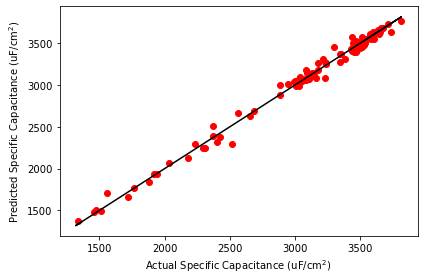

In [8]:
y1_test, test1_pred = fit_model(X1_train, X1_test, y1_train, y1_test)
plot_results(df1, y1_test, test1_pred)